# Handling Linear Missing Data in Python

This Jupyter Notebook demonstrates common techniques for handling missing data in Python using the Pandas and scikit-learn libraries. We'll cover data imputation, removal, and visualization.


## Import Libraries

Let's start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


## Generate Sample Data

We'll create synthetic sample data with missing values and load it into a Pandas DataFrame.

In [2]:
# Generate sample data with missing values
data = {
    'A': [1, 2, 3, np.nan, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, 2, np.nan, 4, 5]
}
df = pd.DataFrame(data)
df.head()

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,3.0,3.0,NaN
3,NaN,4.0,4.0
4,5.0,5.0,5.0


## Detect Missing Data

Use Pandas to detect and identify missing data within the DataFrame.

In [4]:
# Detect missing data
missing_data = df.isnull()
missing_data, df.isnull().sum()


(       A      B      C
 0  False   True  False
 1  False  False  False
 2  False  False   True
 3   True  False  False
 4  False  False  False,
 A    1
 B    1
 C    1
 dtype: int64)

## Dealing with Missing Data

### Removing Missing Data

#### Remove Rows with Missing Values

In [6]:
# Remove rows with missing values
df_no_missing_rows = df.dropna()
df_no_missing_rows


,A,B,C
1,2.0,2.0,2.0
4,5.0,5.0,5.0


#### Remove Columns with Missing Values

In [7]:
# Remove columns with missing values
df_no_missing_cols = df.dropna(axis=1)
df_no_missing_cols


""
0
1
2
3
4


### Imputing Missing Data

We'll perform mean/median imputation using `SimpleImputer` from scikit-learn.

In [8]:
# Impute missing data with mean
imputer = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_mean_imputed


,A,B,C
0,1.00,3.5,1.0
1,2.00,2.0,2.0
2,3.00,3.0,3.0
3,2.75,4.0,4.0
4,5.00,5.0,5.0


## Visualize Missing Data

Create visualizations like heatmaps to visualize the distribution of missing data.

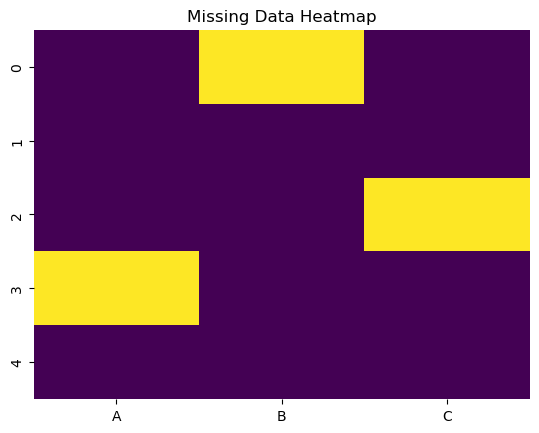

In [9]:
# Visualize missing data
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


## Handling Missing Data in Machine Learning

Discuss strategies for managing missing data in machine learning projects.

In [14]:
# In machine learning, choose the right imputation strategy for missing data
# Use SimpleImputer from scikit-learn to impute missing values
imputer = SimpleImputer(strategy='most_frequent')  # Replace with an appropriate strategy

# Fit and transform your data
X_imputed = imputer.fit_transform(df)
X_imputed

array([[1., 2., 1.],
       [2., 2., 2.],
       [3., 3., 1.],
       [1., 4., 4.],
       [5., 5., 5.]])

In the code above, we import the SimpleImputer class from scikit-learn and create an instance of it with a specific imputation strategy. The available strategies include:

**'mean'**: This strategy replaces missing values with the mean of the non-missing values in the same column.

**'median'**: This strategy replaces missing values with the median of the non-missing values in the same column.

**'most_frequent'**: This strategy replaces missing values with the most frequent value in the same column.

**'constant'**: This strategy replaces missing values with a constant value, which can be specified using the fill_value parameter. For example, you can set strategy='constant' and provide fill_value=0 to impute missing values with zeros.

You can choose the strategy that best fits your specific dataset and problem. After creating the SimpleImputer with your chosen strategy, you can use the fit_transform method to impute missing values in your DataFrame df, resulting in the X_imputed array with missing values replaced according to the selected strategy.

## Conclusion

In this notebook, we've explored various techniques for handling missing data in Python. Properly managing missing data is crucial for data analysis and machine learning tasks.